We will use Drugtest dataset provided by UCI Machine Learning Repository

http://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Druglib.com%29

For simplicity, we will only use the test set which contains fewer observations

In [1]:
import pandas as pd

In [2]:
# get the dataset
!wget https://github.com/nikolausn/Data_Cleaning_Python_Exercise/blob/master/drugsComTest_raw.tsv?raw=true -O drugsComTest_raw.tsv

--2018-11-05 22:28:39--  https://github.com/nikolausn/Data_Cleaning_Python_Exercise/blob/master/drugsComTest_raw.tsv?raw=true
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/nikolausn/Data_Cleaning_Python_Exercise/raw/master/drugsComTest_raw.tsv [following]
--2018-11-05 22:28:39--  https://github.com/nikolausn/Data_Cleaning_Python_Exercise/raw/master/drugsComTest_raw.tsv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nikolausn/Data_Cleaning_Python_Exercise/master/drugsComTest_raw.tsv [following]
--2018-11-05 22:28:39--  https://raw.githubusercontent.com/nikolausn/Data_Cleaning_Python_Exercise/master/drugsComTest_raw.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.184.133
Connecting to raw.github

In [3]:
drugs_pd = pd.read_csv("drugsComTest_raw.tsv",sep="\t")

###  Look at the data size using "shape" command

In [4]:
drugs_pd.shape

(53766, 7)

the value above shows that we have 53,766 rows and 7 columns for this drug dataset

###  Look at the sample rows using pd.head()
the first parameter defines how many rows you want to look at, starting from the first row

In [5]:
drugs_pd.head(10)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4
5,208087,Zyclara,Keratosis,"""4 days in on first 2 weeks. Using on arms an...",4.0,"July 3, 2014",13
6,215892,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6.0,"June 6, 2016",1
7,169852,Amitriptyline,Migraine Prevention,"""This has been great for me. I&#039;ve been on...",9.0,"April 21, 2009",32
8,23295,Methadone,Opiate Withdrawal,"""Ive been on Methadone for over ten years and ...",7.0,"October 18, 2016",21
9,71428,Levora,Birth Control,"""I was on this pill for almost two years. It d...",2.0,"April 16, 2011",3


## Renaming Column
The first column is not named correctly, It looks like it should refer to drugsId. Rename the first column to drugsId

In [6]:
drugs_pd.columns.set_value(drugs_pd.columns.values,"Unnamed: 0","drugsId")
drugs_pd = drugs_pd.reset_index(drop=True)

In [7]:
drugs_pd.head(10)

,drugsId,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4
5,208087,Zyclara,Keratosis,"""4 days in on first 2 weeks. Using on arms an...",4.0,"July 3, 2014",13
6,215892,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6.0,"June 6, 2016",1
7,169852,Amitriptyline,Migraine Prevention,"""This has been great for me. I&#039;ve been on...",9.0,"April 21, 2009",32
8,23295,Methadone,Opiate Withdrawal,"""Ive been on Methadone for over ten years and ...",7.0,"October 18, 2016",21
9,71428,Levora,Birth Control,"""I was on this pill for almost two years. It d...",2.0,"April 16, 2011",3


###  Look at the statistic of our data using pd.describe()
The describe function will return 5 stats value (max, min, mean, std, median)

In [8]:
drugs_pd.describe()

,drugsId,rating,usefulCount
count,53766.000000,53766.000000,53766.000000
mean,116386.701187,6.976900,27.989752
std,67017.739881,3.285207,36.172833
min,0.000000,1.000000,0.000000
25%,58272.500000,4.000000,6.000000
50%,116248.500000,8.000000,16.000000
75%,174586.750000,10.000000,36.000000
max,232284.000000,10.000000,949.000000


From the statistics above we can see that:
- rating has a value range of 1-10. 
- usefulCount has a value between 0 to 949 with mean 27 and standard deviation 36.17

###  lowercase operation: just like in the Openrefine use "lower" method from str class
### uppercase operation, use "upper" method
This method below will lowercase the condition column and assign it to a new column "condition_clean", preserves the history

In [9]:
# lower case condition column
condition_clean = drugs_pd.condition.str.lower()
print("row changes :",sum(drugs_pd.condition!=condition_clean))
drugs_pd["condition_clean"] = condition_clean

row changes : 52811


In [10]:
drugs_pd.head()

,drugsId,drugName,condition,review,rating,date,usefulCount,condition_clean
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22,depression
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17,"crohn's disease, maintenance"
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3,urinary tract infection
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35,weight loss
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4,birth control


###  trim whitespace operation: just like in the openrefine use:
- strip(): trim left and right whitespaces
- lstrip(): trim left whitespaces
- rstrip(): trim right whitespaces

These functions are part of the str class

We will clean the condition_clean by using strip() 



In [11]:
condition_clean = drugs_pd.condition_clean.str.strip()
print("row changes :",sum(drugs_pd.condition_clean!=condition_clean))
drugs_pd["condition_clean"] = condition_clean

row changes : 295


Only 295 cells has problem with the white spaces

## look for all unique values in condition_clean like facet in openrefine using unique()


In [12]:
print(drugs_pd.condition_clean.unique())

['depression' "crohn's disease, maintenance" 'urinary tract infection'
 'weight loss' 'birth control' 'keratosis' 'migraine prevention'
 'opiate withdrawal' 'hot flashes' 'vaginal yeast infection'
 'schizoaffective disorde' 'insomnia' 'narcolepsy' 'smoking cessation'
 'acne' 'bipolar disorde' 'irritable bowel syndrome'
 'keratoconjunctivitis sicca' 'hyperhidrosis' 'panic disorde'
 'onychomycosis, fingernail' 'rosacea' 'bowel preparation'
 'constipation, drug induced' nan 'diabetes, type 2' 'pain'
 'lipodystrophy' 'alcohol dependence' 'emergency contraception'
 'major depressive disorde' 'anxiety' 'bladder infection'
 'benign prostatic hyperplasia' 'rheumatoid arthritis' 'endometriosis'
 'adhd' 'restless legs syndrome' 'conjunctivitis, allergic'
 "raynaud's syndrome" 'schizophrenia' 'diabetes, type 1'
 'kidney infections' 'generalized anxiety disorde' 'obesity'
 'nausea/vomiting' 'osteoarthritis' 'motion sickness'
 'high blood pressure' 'psoriatic arthritis' 'interstitial cystitis'
 'po

In [13]:
print(len(drugs_pd.condition_clean.unique()))

709


There are 709 unique values, but if we look closely, there are some dirty texts that are not informational, e.g. <:/span>, and symbols like ', ", / and so on.

Firstly we will clean <:/span> values using lambda operation

## remove span from the condition_clean column using apply and lambda operation

In [14]:
condition_clean = drugs_pd.condition_clean.apply(lambda x:str(x).replace("</span>","")).values
print("row changes :",sum(drugs_pd.condition_clean!=condition_clean))
drugs_pd["condition_clean"] = condition_clean

row changes : 566


566 rows with <-/span> value inside removed.
Recheck the unique values in condition_clean

In [15]:
print(drugs_pd.condition_clean.unique())

['depression' "crohn's disease, maintenance" 'urinary tract infection'
 'weight loss' 'birth control' 'keratosis' 'migraine prevention'
 'opiate withdrawal' 'hot flashes' 'vaginal yeast infection'
 'schizoaffective disorde' 'insomnia' 'narcolepsy' 'smoking cessation'
 'acne' 'bipolar disorde' 'irritable bowel syndrome'
 'keratoconjunctivitis sicca' 'hyperhidrosis' 'panic disorde'
 'onychomycosis, fingernail' 'rosacea' 'bowel preparation'
 'constipation, drug induced' 'nan' 'diabetes, type 2' 'pain'
 'lipodystrophy' 'alcohol dependence' 'emergency contraception'
 'major depressive disorde' 'anxiety' 'bladder infection'
 'benign prostatic hyperplasia' 'rheumatoid arthritis' 'endometriosis'
 'adhd' 'restless legs syndrome' 'conjunctivitis, allergic'
 "raynaud's syndrome" 'schizophrenia' 'diabetes, type 1'
 'kidney infections' 'generalized anxiety disorde' 'obesity'
 'nausea/vomiting' 'osteoarthritis' 'motion sickness'
 'high blood pressure' 'psoriatic arthritis' 'interstitial cystitis'
 '

## remove all the symbols on condition_clean

Because for this we need more methods, we must make a function to filter out non-alphabet and number symbol.
This code below is only one way to do it. You might find ways better than this

In [16]:
import re
# prepare script for removal
def remove_symbol(my_str:str):
    reg_exclusion=r'[^a-z|0-9| |-]'
    return re.sub(reg_exclusion,'',my_str)

In [17]:
# execute cleaning
condition_clean = drugs_pd.condition_clean.apply(lambda x:remove_symbol(x)).values
print("row changes :",sum(drugs_pd.condition_clean!=condition_clean))
drugs_pd["condition_clean"] = condition_clean

row changes : 3542


In [18]:
# recheck unique values
print(drugs_pd.condition_clean.unique())

['depression' 'crohns disease maintenance' 'urinary tract infection'
 'weight loss' 'birth control' 'keratosis' 'migraine prevention'
 'opiate withdrawal' 'hot flashes' 'vaginal yeast infection'
 'schizoaffective disorde' 'insomnia' 'narcolepsy' 'smoking cessation'
 'acne' 'bipolar disorde' 'irritable bowel syndrome'
 'keratoconjunctivitis sicca' 'hyperhidrosis' 'panic disorde'
 'onychomycosis fingernail' 'rosacea' 'bowel preparation'
 'constipation drug induced' 'nan' 'diabetes type 2' 'pain'
 'lipodystrophy' 'alcohol dependence' 'emergency contraception'
 'major depressive disorde' 'anxiety' 'bladder infection'
 'benign prostatic hyperplasia' 'rheumatoid arthritis' 'endometriosis'
 'adhd' 'restless legs syndrome' 'conjunctivitis allergic'
 'raynauds syndrome' 'schizophrenia' 'diabetes type 1' 'kidney infections'
 'generalized anxiety disorde' 'obesity' 'nauseavomiting' 'osteoarthritis'
 'motion sickness' 'high blood pressure' 'psoriatic arthritis'
 'interstitial cystitis' 'postmenopa

Now or condition_clean column already looked clean

In [19]:
drugs_pd.head()

,drugsId,drugName,condition,review,rating,date,usefulCount,condition_clean
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22,depression
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17,crohns disease maintenance
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3,urinary tract infection
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35,weight loss
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4,birth control


## Convert text to date
To do this, we must prepare a function that read the string value and returns the datetime using DateTime module and strptime

Depend on the format they used in the column we must specify the string format of the date values.

You can get more info here: https://docs.python.org/3/library/datetime.html

In [20]:
from datetime import datetime

In [21]:
def extract_time(time_str:str,date_format='%B %d, %Y'):
    #datetime_object = datetime.strptime('2010-03-06 21:13:04 UTC', '%Y-%m-%d %H:%M:%S UTC')
    datetime_object = datetime.strptime(time_str, date_format)
    return (datetime_object,datetime_object.year,datetime_object.month,datetime_object.day)

In [22]:
# assign date
new_date_cols = pd.DataFrame(list(drugs_pd.date.apply(lambda x:extract_time(x)).values),columns=["date_clean","year","month","day"])

In [23]:
# combine it with the drugs_pd dataframe
drugs_pd = drugs_pd.join(new_date_cols)

In [24]:
drugs_pd.head()

,drugsId,drugName,condition,review,rating,date,usefulCount,condition_clean,date_clean,year,month,day
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22,depression,2012-02-28,2012,2,28
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17,crohns disease maintenance,2009-05-17,2009,5,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3,urinary tract infection,2017-09-29,2017,9,29
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35,weight loss,2017-03-05,2017,3,5
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4,birth control,2015-10-22,2015,10,22


## display distribution of yearly reviews like facet in openrefine
We use the Matplotlib to plot the distribution of values


(array([ 1648.,  4006.,  2814.,  3772.,  3375.,  4081.,  4053.,  9028.,
        11765.,  9224.]),
 array([2008. , 2008.9, 2009.8, 2010.7, 2011.6, 2012.5, 2013.4, 2014.3,
        2015.2, 2016.1, 2017. ]),
 <a list of 10 Patch objects>)

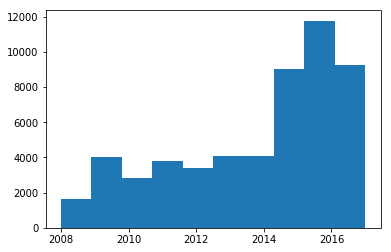

In [25]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.hist(drugs_pd.year)

## display word cloud from the condition_clean
This example below is one goal why we need to clean up the condition_clean. After cleaning our data, we can make a word cloud or another text analysis processing from it.

In [26]:
!pip install wordcloud -t ./

The directory '/home/jovyan/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/jovyan/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
    100% |████████████████████████████████| 368kB 1.3MB/s eta 0:00:01
    100% |████████████████████████████████| 2.0MB 263kB/s eta 0:00:01
    100% |████████████████████████████████| 13.9MB 38kB/s  eta 0:00:01   62% |████████████████████            | 8.7MB 29.9MB/s eta 0:00:01
Target directory /home/nnp2/test-dc/numpy already exists. Specify --upgrade to force replacement.
Target directory /home/nnp2/test-dc/Pillow-5.3.0.dist-info already exists. Specify --upgrade to force replacement.
Target director

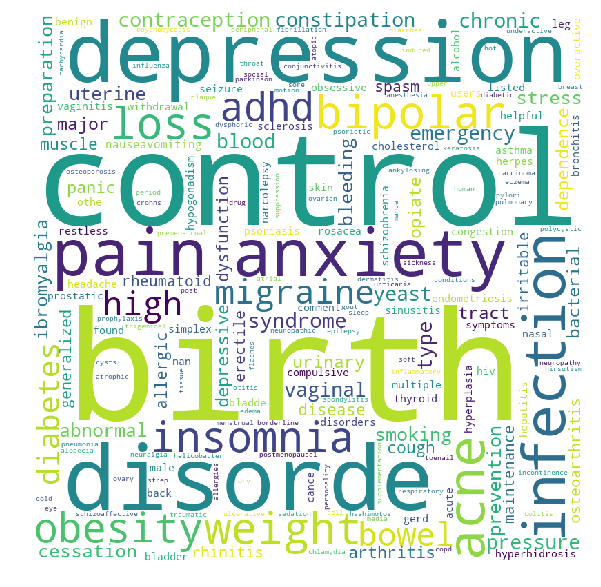

In [27]:
from wordcloud import WordCloud 
from matplotlib import pyplot as plt

condition_text = drugs_pd.condition_clean.values

#print(comment_words)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                min_font_size = 10,collocations=False).generate_from_text(" ".join(condition_text))
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()
